<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Financial Theory with Python
**&mdash;A Gentle Introduction**

Dr Yves J Hilpisch | The Python Quants | The AI Machine

http://tpq.io | http://aimachine.io | [@dyjh](http://twitter.com/dyjh)

<img src="https://hilpisch.com/finpy_cover.png" width=30% border=1px align=left>

## Chapter 03 &mdash; Three State Economy

## Attainable Contingent Claims 

In [1]:
import numpy as np
from numpy.random import default_rng
np.set_printoptions(precision=5, suppress=True)

In [2]:
rng = default_rng(100)

In [3]:
B = (10, np.array((11, 11, 11)))

In [4]:
S = (10, np.array((20, 10, 5)))

In [5]:
n = 1000

In [6]:
b = rng.random(n)

In [7]:
b[:5]

array([0.83498, 0.59655, 0.28886, 0.04295, 0.97365])

In [8]:
s = rng.random(n)

In [9]:
A = [b[i] * B[1] + s[i] * S[1] for i in range(n)]

In [10]:
A = np.array(A)

In [11]:
A[:3]

array([[19.86232, 14.52356, 11.85418],
       [26.35796, 16.46003, 11.51106],
       [11.64939,  7.41344,  5.29547]])

In [12]:
from pylab import mpl, plt 
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_formats = ['svg']

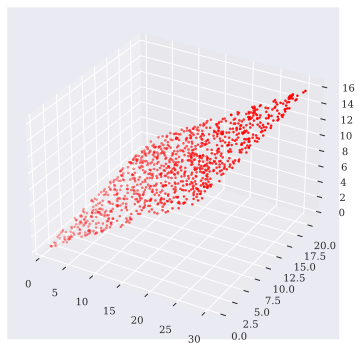

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c='r', marker='.');

## Martingale Measures

In [14]:
Q = np.array((0.3, 0.3, 0.4))

In [15]:
np.dot(Q, S[1])

11.0

## Super-Replication

In [16]:
C1 = np.array((1, 0, 0))

In [17]:
1 / B[1][0] * B[1] >= C1

array([ True,  True,  True])

In [18]:
1 / B[1][0] * B[0]

0.9090909090909092

In [19]:
def V(phi, t):
    return phi[0] * B[t] + phi[1] * S[t]

In [20]:
phi = np.array((0.04, 0.03))

In [21]:
V(phi, 0)

0.7

In [22]:
V(phi, 1)

array([1.04, 0.74, 0.59])

In [23]:
from scipy.optimize import minimize

In [24]:
cons = ({'type': 'ineq', 'fun': lambda phi: V(phi, 1) - C1})

In [25]:
res = minimize(lambda phi: V(phi, 0),
               (0.01, 0.01),
               method='SLSQP',
               constraints=cons)

In [26]:
res

     fun: 0.3636363636310989
     jac: array([10., 10.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([-0.0303 ,  0.06667])

In [27]:
V(res['x'], 0)

0.3636363636310989

In [28]:
V(res['x'], 1)

array([ 1.     ,  0.33333, -0.     ])

## Approximative Replication

In [29]:
M = np.array((B[1], S[1])).T

In [30]:
M

array([[11, 20],
       [11, 10],
       [11,  5]])

In [31]:
reg = np.linalg.lstsq(M, C1, rcond=-1)

In [32]:
reg
# (array, 
#  array,
#  int,
#  array)

(array([-0.04545,  0.07143]), array([0.07143]), 2, array([28.93836,  7.11136]))

In [33]:
V(reg[0], 0)

0.2597402597402598

In [34]:
V(reg[0], 1)

array([ 0.92857,  0.21429, -0.14286])

In [35]:
V(reg[0], 1) - C1

array([-0.07143,  0.21429, -0.14286])

In [36]:
np.mean((V(reg[0], 1) - C1) ** 2)

0.02380952380952381

## Capital Market Line

In [37]:
mu_S = 7 / 6 - 1

In [38]:
mu_S

0.16666666666666674

In [39]:
sigma_S = (S[1] / S[0]).std()

In [40]:
sigma_S

0.6236095644623235

In [41]:
s = np.linspace(-2, 2, 25)

In [42]:
b = (1 - s)

In [43]:
i = 0.1

In [44]:
mu = b * i + s * mu_S

In [45]:
sigma = np.abs(s * sigma_S)

Text(0, 0.5, '$\\mu$')

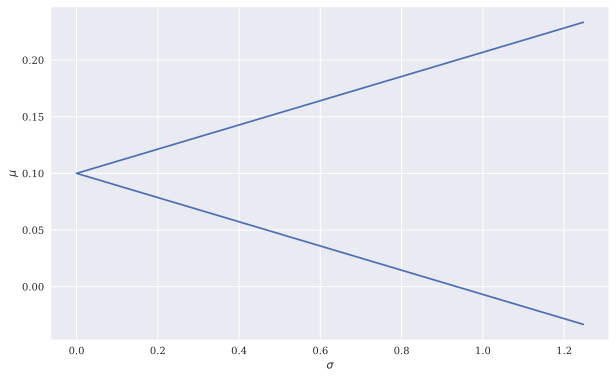

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(sigma, mu)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')

## Capital Asset Pricing Model

In [47]:
beta = np.linspace(0, 2, 25)

In [48]:
mu = i + beta * (mu_S - i)

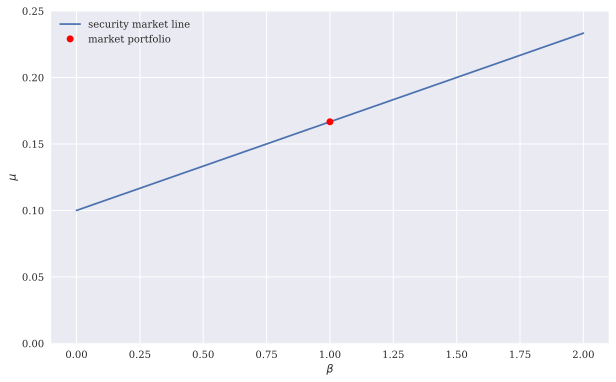

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(beta, mu, label='security market line')
plt.xlabel('$\\beta$')
plt.ylabel('$\mu$')
plt.ylim(0, 0.25)
plt.plot(1, mu_S, 'ro', label='market portfolio')
plt.legend(loc=0);

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>